In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import mne 

#### Generating Random gaussain Noise [Testing purpose only]

- We take a max bin of 1000 
- Calc_bin_index 
    - used to calcuate the index of the value in the bin , the index has been shifted 0.5 and 

In [2]:
s1 = np.random.normal(0, 1, 100000)
s2 = np.random.normal(4, 1, 100000)

In [3]:
NUM_BINS= 1000

In [4]:
def calc_bin_index(s, mean, sigma, dont_skip=True): 
    index = int(((s - mean)  / (4*sigma)   + 0.5) * NUM_BINS)
    if dont_skip:
        if index < 0: index = 0
        if index > NUM_BINS - 1: index = NUM_BINS - 1
    return index

In [5]:
def make_histogram(s, mean, sigma):
    a = np.zeros(NUM_BINS, dtype=np.int32)
    skipped = 0
    for value in s:
        index = calc_bin_index(value, mean, sigma, dont_skip=False)
        if index >= 0 and index < NUM_BINS - 1: a[index] += 1
        else: skipped += 1
    print(skipped)
    return a
        

In [6]:
hist1 = make_histogram(s1, 0, 1)


4539


In [7]:
hist2 = make_histogram(s2, 4, 1)


4688


In [8]:
s_hist1 = np.convolve(hist1, np.array([1, 1, 1, 1])/4)
s_hist2 = np.convolve(hist2, np.array([1, 1, 1, 1])/4)

In [9]:
s_hist1 /= sum(s_hist1)
s_hist2 /= sum(s_hist2)

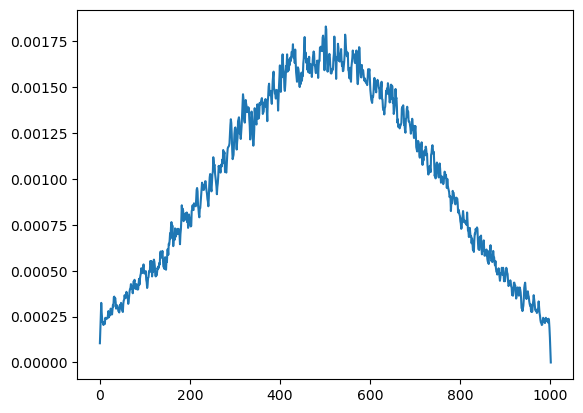

In [10]:
plt.plot(s_hist1)

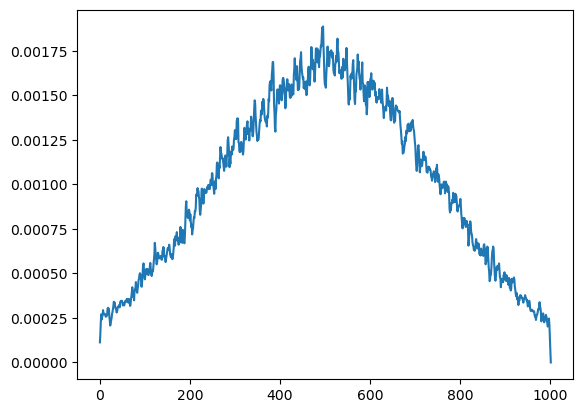

In [11]:
plt.plot(s_hist2)

In [12]:
def calc_lr(x):
    p1 = s_hist1[calc_bin_index(x,  0, 1)]
    p2 = s_hist2[calc_bin_index(x,  4, 1)]
    # print(p1, p2)
    return p2/p1
   

In [13]:
calc_lr(2.)

0.598155851892265

In [14]:
def classify(x, tau = 1):
    if calc_lr(x) > tau: return True 
    else: return False

In [15]:
plot_hist1 = np.array(NUM_BINS)


In [16]:
test_ds = np.append(s1[:5000], s2[:5000])
test_ds.shape


(10000,)

In [17]:
fp_arr, tp_arr = [], []
for tau in np.arange(1, 5, 0.2):
    results = np.empty(test_ds.shape)
    for i,samp in enumerate(test_ds):
        results[i] = classify(samp, tau=tau)
    
    num_fp = sum(results[:5000])
    num_tp = sum(results[5000:])
    fp_arr.append(num_fp)
    tp_arr.append(num_tp)


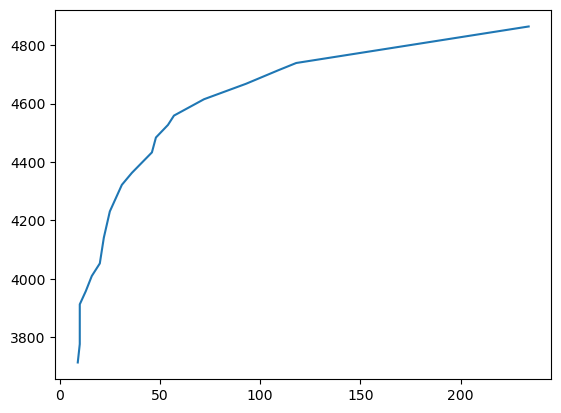

In [18]:
plt.plot(fp_arr , tp_arr)

### Trying for Signal for single channel 

In [19]:
from utils import patient_list , Get_Np_Signal

healthy , epiliptic = patient_list("F:/Documents/EE531/Project/EEG Data for Project")



Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\HRV010_NewEpoch 3.fif...
Isotrak not found
    Range : 121250 ... 160000 =    970.000 ...  1280.000 secs
Ready.


f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\HRV010_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)


Reading 0 ... 38750  =      0.000 ...   310.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SHPP290716_NewEpoch 3.fif...
Isotrak not found
    Range : 48750 ... 125000 =    195.000 ...   500.000 secs
Ready.
Reading 0 ... 76250  =      0.000 ...   305.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKCT508857_NewEpoch 3.fif...
Isotrak not found
    Range : 16250 ... 54875 =    130.000 ...   439.000 secs
Ready.
Reading 0 ... 38625  =      0.000 ...   309.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD011222_NewEpoch 3.fif...
Isotrak not found
    Range : 20375 ... 60625 =    163.000 ...   485.000 secs
Ready.
Reading 0 ... 40250  =      0.000 ...   322.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD021122_NewEpoch 3.fif...
Isotrak not found
    Range : 22750 ... 63250 =    182.000 ...   506.000 secs
Ready.
Reading

f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SHPP290716_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKCT508857_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/

    Range : 27625 ... 53500 =    221.000 ...   428.000 secs
Ready.
Reading 0 ... 25875  =      0.000 ...   207.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD080880_NewEpoch 3.fif...
Isotrak not found
    Range : 128750 ... 151375 =   1030.000 ...  1211.000 secs
Ready.
Reading 0 ... 22625  =      0.000 ...   181.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD112022_NewEpoch 3.fif...
Isotrak not found
    Range : 23125 ... 63000 =    185.000 ...   504.000 secs
Ready.
Reading 0 ... 39875  =      0.000 ...   319.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD141022_NewEpoch 3.fif...
Isotrak not found
    Range : 20250 ... 57875 =    162.000 ...   463.000 secs
Ready.
Reading 0 ... 37625  =      0.000 ...   301.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD160023_NewEpoch 3.fif...
Isotrak not found


f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD080880_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD112022_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/

    Range : 21375 ... 59875 =    171.000 ...   479.000 secs
Ready.
Reading 0 ... 38500  =      0.000 ...   308.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD160223_NewEpoch 3.fif...
Isotrak not found
    Range : 18375 ... 57000 =    147.000 ...   456.000 secs
Ready.
Reading 0 ... 38625  =      0.000 ...   309.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD1622023_NewEpoch 3.fif...
Isotrak not found
    Range : 15375 ... 54750 =    123.000 ...   438.000 secs
Ready.
Reading 0 ... 39375  =      0.000 ...   315.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD190822_NewEpoch 3.fif...
Isotrak not found
    Range : 34000 ... 58250 =    272.000 ...   466.000 secs
Ready.
Reading 0 ... 24250  =      0.000 ...   194.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD200022_NewEpoch 3.fif...
Isotrak not found
    Ran

f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD160223_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD1622023_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:

Isotrak not found
    Range : 19000 ... 39875 =    152.000 ...   319.000 secs
Ready.
Reading 0 ... 20875  =      0.000 ...   167.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD221010_NewEpoch 3.fif...
Isotrak not found
    Range : 24250 ... 64750 =    194.000 ...   518.000 secs
Ready.
Reading 0 ... 40500  =      0.000 ...   324.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD221993_NewEpoch 3.fif...
Isotrak not found
    Range : 146125 ... 175250 =   1169.000 ...  1402.000 secs
Ready.
Reading 0 ... 29125  =      0.000 ...   233.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD233497_NewEpoch 3.fif...
Isotrak not found
    Range : 24000 ... 49875 =    192.000 ...   399.000 secs
Ready.
Reading 0 ... 25875  =      0.000 ...   207.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD240622_NewEpoch 3.fif...
Isotra

f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD220622_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD221010_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/

Isotrak not found
    Range : 38125 ... 84250 =    305.000 ...   674.000 secs
Ready.
Reading 0 ... 46125  =      0.000 ...   369.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD270722_NewEpoch 3.fif...
Isotrak not found
    Range : 32625 ... 73000 =    261.000 ...   584.000 secs
Ready.
Reading 0 ... 40375  =      0.000 ...   323.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD271222_NewEpoch 3.fif...
Isotrak not found
    Range : 17875 ... 55750 =    143.000 ...   446.000 secs
Ready.
Reading 0 ... 37875  =      0.000 ...   303.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD368168_NewEpoch 1.fif...
Isotrak not found
    Range : 14000 ... 18250 =    112.000 ...   146.000 secs
Ready.
Reading 0 ... 4250  =      0.000 ...    34.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD368168_NewEpoch 2.fif...
Isotrak n

f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD270722_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD271222_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/

Isotrak not found
    Range : 110125 ... 144500 =    881.000 ...  1156.000 secs
Ready.
Reading 0 ... 34375  =      0.000 ...   275.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD887744_NewEpoch 3.fif...
Isotrak not found
    Range : 26750 ... 67000 =    214.000 ...   536.000 secs
Ready.
Reading 0 ... 40250  =      0.000 ...   322.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKMS001254_NewEpoch 3.fif...
Isotrak not found
    Range : 12750 ... 52875 =    102.000 ...   423.000 secs
Ready.
Reading 0 ... 40125  =      0.000 ...   321.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKMS004321_NewEpoch 3.fif...
Isotrak not found
    Range : 33500 ... 71250 =    268.000 ...   570.000 secs
Ready.
Reading 0 ... 37750  =      0.000 ...   302.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKMS301122_NewEpoch 1.fif...
Isotra

f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD638768_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKDD887744_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/

Isotrak not found
    Range : 13000 ... 17500 =    104.000 ...   140.000 secs
Ready.
Reading 0 ... 4500  =      0.000 ...    36.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKMS301122_NewEpoch 3.fif...
Isotrak not found
    Range : 22000 ... 60750 =    176.000 ...   486.000 secs
Ready.
Reading 0 ... 38750  =      0.000 ...   310.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKMS525376_NewEpoch 3.fif...
Isotrak not found
    Range : 18500 ... 57250 =    148.000 ...   458.000 secs
Ready.
Reading 0 ... 38750  =      0.000 ...   310.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS399977_NewEpoch 3.fif...
Isotrak not found
    Range : 15875 ... 54625 =    127.000 ...   437.000 secs
Ready.
Reading 0 ... 38750  =      0.000 ...   310.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS420805_NewEpoch 3.fif...
Isotr

f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKMS301122_NewEpoch 2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Healthy\SKMS301122_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/

Isotrak not found
    Range : 14125 ... 52750 =    113.000 ...   422.000 secs
Ready.
Reading 0 ... 38625  =      0.000 ...   309.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS448625_NewEpoch 3.fif...
Isotrak not found
    Range : 32125 ... 70250 =    257.000 ...   562.000 secs
Ready.
Reading 0 ... 38125  =      0.000 ...   305.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS458593_NewEpoch 3.fif...
Isotrak not found
    Range : 11500 ... 50000 =     92.000 ...   400.000 secs
Ready.
Reading 0 ... 38500  =      0.000 ...   308.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS461667_NewEpoch 3.fif...
Isotrak not found
    Range : 13500 ... 52250 =    108.000 ...   418.000 secs
Ready.
Reading 0 ... 38750  =      0.000 ...   310.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS473344_NewEpoch 3.fif...


f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS446795_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS448625_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename 

Isotrak not found
    Range : 27625 ... 65625 =    221.000 ...   525.000 secs
Ready.
Reading 0 ... 38000  =      0.000 ...   304.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS490904_NewEpoch 3.fif...
Isotrak not found
    Range : 43375 ... 67375 =    347.000 ...   539.000 secs
Ready.
Reading 0 ... 24000  =      0.000 ...   192.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS524763_NewEpoch 3.fif...
Isotrak not found
    Range : 12500 ... 50625 =    100.000 ...   405.000 secs
Ready.
Reading 0 ... 38125  =      0.000 ...   305.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS528283_NewEpoch 3.fif...
Isotrak not found
    Range : 32500 ... 111500 =    130.000 ...   446.000 secs
Ready.
Reading 0 ... 79000  =      0.000 ...   316.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS529611_NewEpoch 3.fif...

f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS490904_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS524763_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename 

Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS539742_NewEpoch 3.fif...
Isotrak not found
    Range : 97125 ... 137125 =    777.000 ...  1097.000 secs
Ready.
Reading 0 ... 40000  =      0.000 ...   320.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS549000_NewEpoch 3.fif...
Isotrak not found
    Range : 124250 ... 144250 =    994.000 ...  1154.000 secs
Ready.
Reading 0 ... 20000  =      0.000 ...   160.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS554139_NewEpoch 3.fif...
Isotrak not found
    Range : 131250 ... 170125 =   1050.000 ...  1361.000 secs
Ready.
Reading 0 ... 38875  =      0.000 ...   311.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS557300_NewEpoch 3.fif...
Isotrak not found
    Range : 44125 ... 68375 =    353.000 ...   547.000 secs
Ready.
Reading 0 ... 24250  =      0.000 ...   194.000 sec

f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS539742_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS549000_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename 

Isotrak not found
    Range : 16250 ... 54500 =    130.000 ...   436.000 secs
Ready.
Reading 0 ... 38250  =      0.000 ...   306.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS573926_NewEpoch 3.fif...
Isotrak not found
    Range : 142375 ... 159125 =   1139.000 ...  1273.000 secs
Ready.
Reading 0 ... 16750  =      0.000 ...   134.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS574506_NewEpoch 3.fif...
Isotrak not found
    Range : 153250 ... 177500 =   1226.000 ...  1420.000 secs
Ready.
Reading 0 ... 24250  =      0.000 ...   194.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS574643_NewEpoch 3.fif...
Isotrak not found
    Range : 139000 ... 178250 =   1112.000 ...  1426.000 secs
Ready.
Reading 0 ... 39250  =      0.000 ...   314.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS576195_NewEpoch 3.f

f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS572261_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS573926_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename 

    Range : 14625 ... 55125 =    117.000 ...   441.000 secs
Ready.
Reading 0 ... 40500  =      0.000 ...   324.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS577339_NewEpoch 3.fif...
Isotrak not found
    Range : 11375 ... 45500 =     91.000 ...   364.000 secs
Ready.
Reading 0 ... 34125  =      0.000 ...   273.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS580808_NewEpoch 3.fif...
Isotrak not found
    Range : 14250 ... 54125 =    114.000 ...   433.000 secs
Ready.
Reading 0 ... 39875  =      0.000 ...   319.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS588932_NewEpoch 3.fif...
Isotrak not found
    Range : 12875 ... 44000 =    103.000 ...   352.000 secs
Ready.
Reading 0 ... 31125  =      0.000 ...   249.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS591211_NewEpoch 3.fif...
Isotrak not found


f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS577339_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS580808_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename 

    Range : 212875 ... 259750 =   1703.000 ...  2078.000 secs
Ready.
Reading 0 ... 46875  =      0.000 ...   375.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS591612_NewEpoch 3.fif...
Isotrak not found
    Range : 50125 ... 78125 =    401.000 ...   625.000 secs
Ready.
Reading 0 ... 28000  =      0.000 ...   224.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS592234_NewEpoch 3.fif...
Isotrak not found
    Range : 108750 ... 143125 =    870.000 ...  1145.000 secs
Ready.
Reading 0 ... 34375  =      0.000 ...   275.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS592789_NewEpoch 3.fif...
Isotrak not found
    Range : 15125 ... 54000 =    121.000 ...   432.000 secs
Ready.
Reading 0 ... 38875  =      0.000 ...   311.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS593801_NewEpoch 3.fif...
Isotrak not fo

f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS591612_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS592234_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename 

Isotrak not found
    Range : 191500 ... 230125 =   1532.000 ...  1841.000 secs
Ready.
Reading 0 ... 38625  =      0.000 ...   309.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS604373_NewEpoch 3.fif...
Isotrak not found
    Range : 115500 ... 153625 =    924.000 ...  1229.000 secs
Ready.
Reading 0 ... 38125  =      0.000 ...   305.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS606699_NewEpoch 3.fif...
Isotrak not found
    Range : 21750 ... 61250 =    174.000 ...   490.000 secs
Ready.
Reading 0 ... 39500  =      0.000 ...   316.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS608693_NewEpoch 3.fif...
Isotrak not found
    Range : 17750 ... 55375 =    142.000 ...   443.000 secs
Ready.
Reading 0 ... 37625  =      0.000 ...   301.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS611759_NewEpoch 3.fif

f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS604373_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS606699_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename 

    Range : 16500 ... 56500 =    132.000 ...   452.000 secs
Ready.
Reading 0 ... 40000  =      0.000 ...   320.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS612983_NewEpoch 3.fif...
Isotrak not found
    Range : 19625 ... 58125 =    157.000 ...   465.000 secs
Ready.
Reading 0 ... 38500  =      0.000 ...   308.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS614289_NewEpoch 3.fif...
Isotrak not found
    Range : 17875 ... 57375 =    143.000 ...   459.000 secs
Ready.
Reading 0 ... 39500  =      0.000 ...   316.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS615793_NewEpoch 3.fif...
Isotrak not found
    Range : 15250 ... 55000 =    122.000 ...   440.000 secs
Ready.
Reading 0 ... 39750  =      0.000 ...   318.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS616332_NewEpoch 3.fif...
Isotrak not found


f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS612983_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS614289_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename 

Reading 0 ... 38750  =      0.000 ...   310.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS618479_NewEpoch 3.fif...
Isotrak not found
    Range : 24375 ... 62500 =    195.000 ...   500.000 secs
Ready.
Reading 0 ... 38125  =      0.000 ...   305.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS618668_NewEpoch 3.fif...
Isotrak not found
    Range : 12250 ... 50875 =     98.000 ...   407.000 secs
Ready.
Reading 0 ... 38625  =      0.000 ...   309.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS619319_NewEpoch 3.fif...
Isotrak not found
    Range : 17375 ... 55875 =    139.000 ...   447.000 secs
Ready.
Reading 0 ... 38500  =      0.000 ...   308.000 secs...
Opening raw data file F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS622209_NewEpoch 3.fif...
Isotrak not found
    Range : 14125 ... 52875 =    113.000 ...   423.000 secs
Ready.


f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS618479_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS618668_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)
f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename 

Isotrak not found
    Range : 16000 ... 54250 =    128.000 ...   434.000 secs
Ready.
Reading 0 ... 38250  =      0.000 ...   306.000 secs...


f:\Documents\EE531\Project\EEG_data_classifier\utils.py:12: RuntimeWarning: This filename (F:/Documents/EE531/Project/EEG Data for Project/Epileptic\SKMS638172_NewEpoch 3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(name , preload = True)


1775


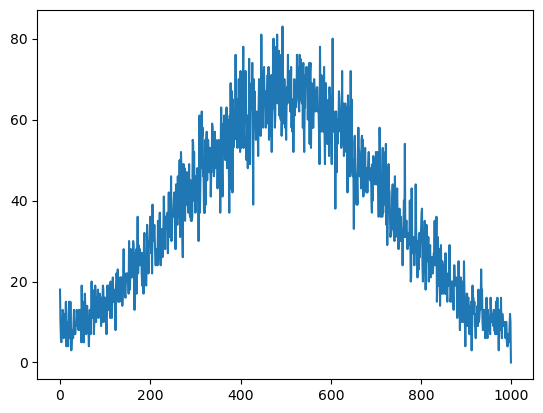

In [21]:
healthy_0 = Get_Np_Signal(healthy[0])[0]
healthy_plot = make_histogram(healthy_0 , np.mean(healthy_0) , np.std(healthy_0) )
healthy_0 = np.convolve(healthy_0, np.array([1, 1, 1, 1])/4)
plt.plot(healthy_plot)
